# Note : There is NO one standard solution for any problem, as long as you are able to achieve better accuracy then you have built good model.
    Below is one of the way to analyize and build the model. 

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file and convert into dataframe
data =pd.read_csv('Test_Sales_LinReg.csv')
data.head()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [3]:
data.shape

(305, 6)

In [4]:
# Understand data at high level. Check the statistics of data set
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [5]:
# Check the nulls
data.isnull().sum()

Republic    10
NDTV         5
TV5          0
TV9          8
AajTak       5
sales        0
dtype: int64

In [6]:
# Fill the null values
data['Republic'] = data['Republic'].fillna(data['Republic'].mean())

data['NDTV'] = data['NDTV'].fillna(data['NDTV'].mean())

data['TV9']  = data['TV9'].fillna(data['TV9'].mean())

data['AajTak']  = data['AajTak'].fillna(data['AajTak'].mean())

In [7]:
# Verify if NaN's are filled

data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


All the nulls have been filled as we can see count showing 305 for all the variables. Let's visualize the data and analyze the relationship between independent and dependent variables:

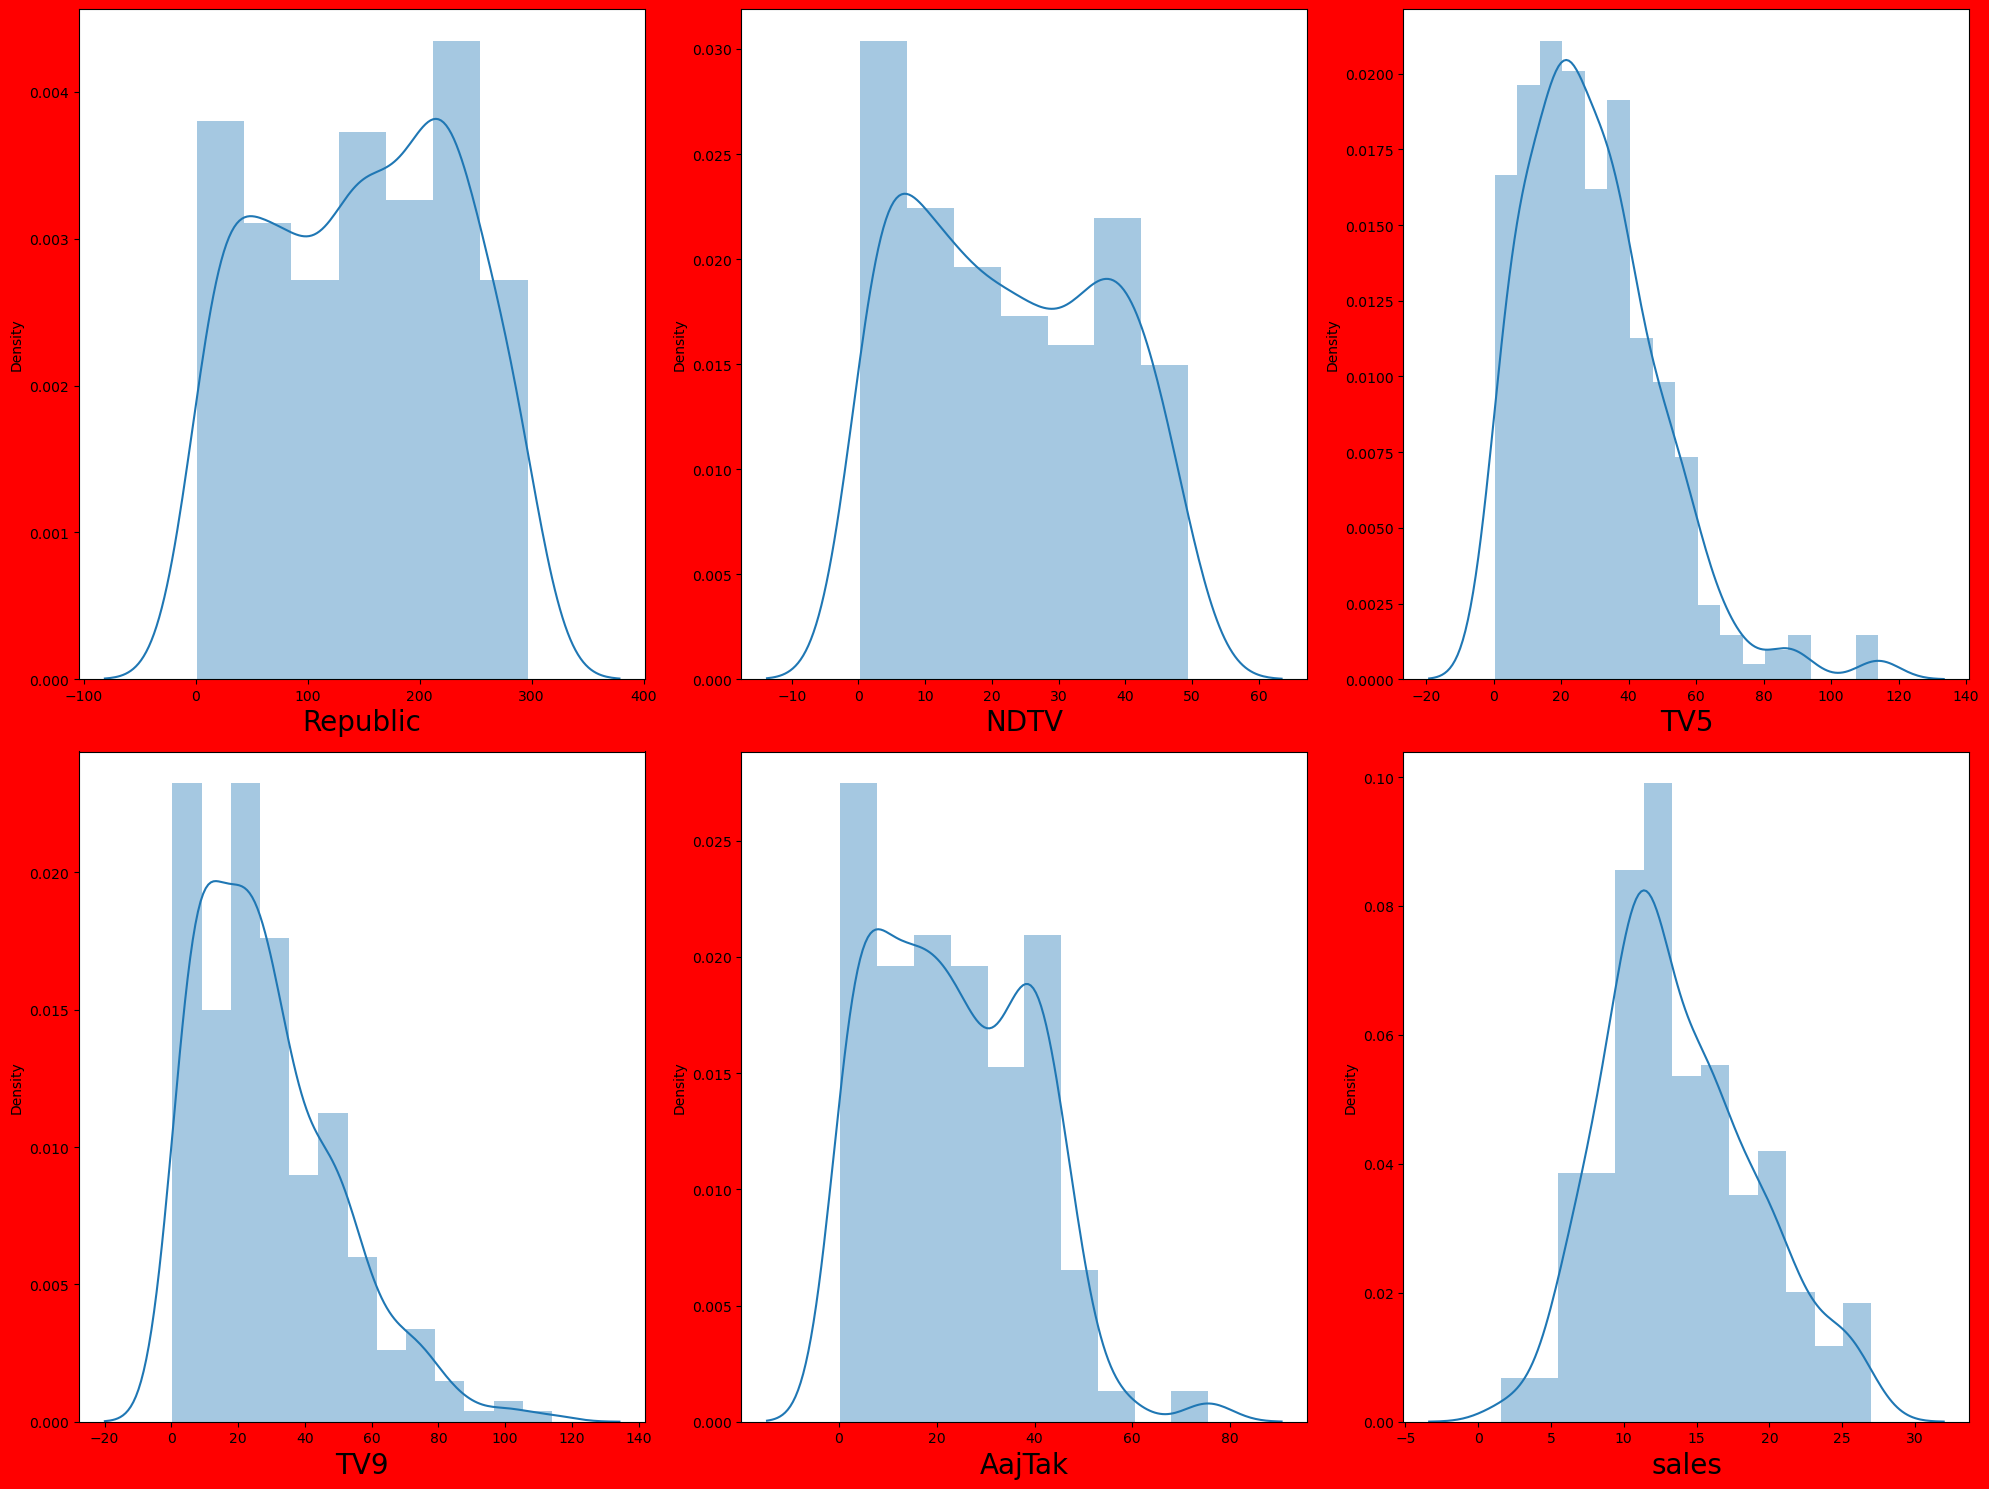

In [8]:
# let's see how data is distributed for every column


plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be too much of skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.


In [9]:
# Divide data set into features and label
y = data['sales']
X = data.drop(columns = ['sales'])

In [10]:
y

0       7.2
1      11.8
2      13.2
3       4.8
4      10.6
       ... 
300    15.9
301     6.7
302    10.8
303     9.9
304     5.9
Name: sales, Length: 305, dtype: float64

In [11]:
X

,Republic,NDTV,TV5,TV9,AajTak
0,8.7,48.9,4.0,75.0,49.0
1,57.5,32.8,65.9,23.5,57.5
2,120.2,19.6,7.2,11.6,18.5
3,8.6,2.1,46.0,1.0,2.6
4,199.8,2.6,52.9,21.2,2.9
...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9
301,18.7,12.1,23.7,23.4,18.7
302,39.5,41.1,17.6,5.8,39.5
303,75.5,10.8,8.3,6.0,75.5


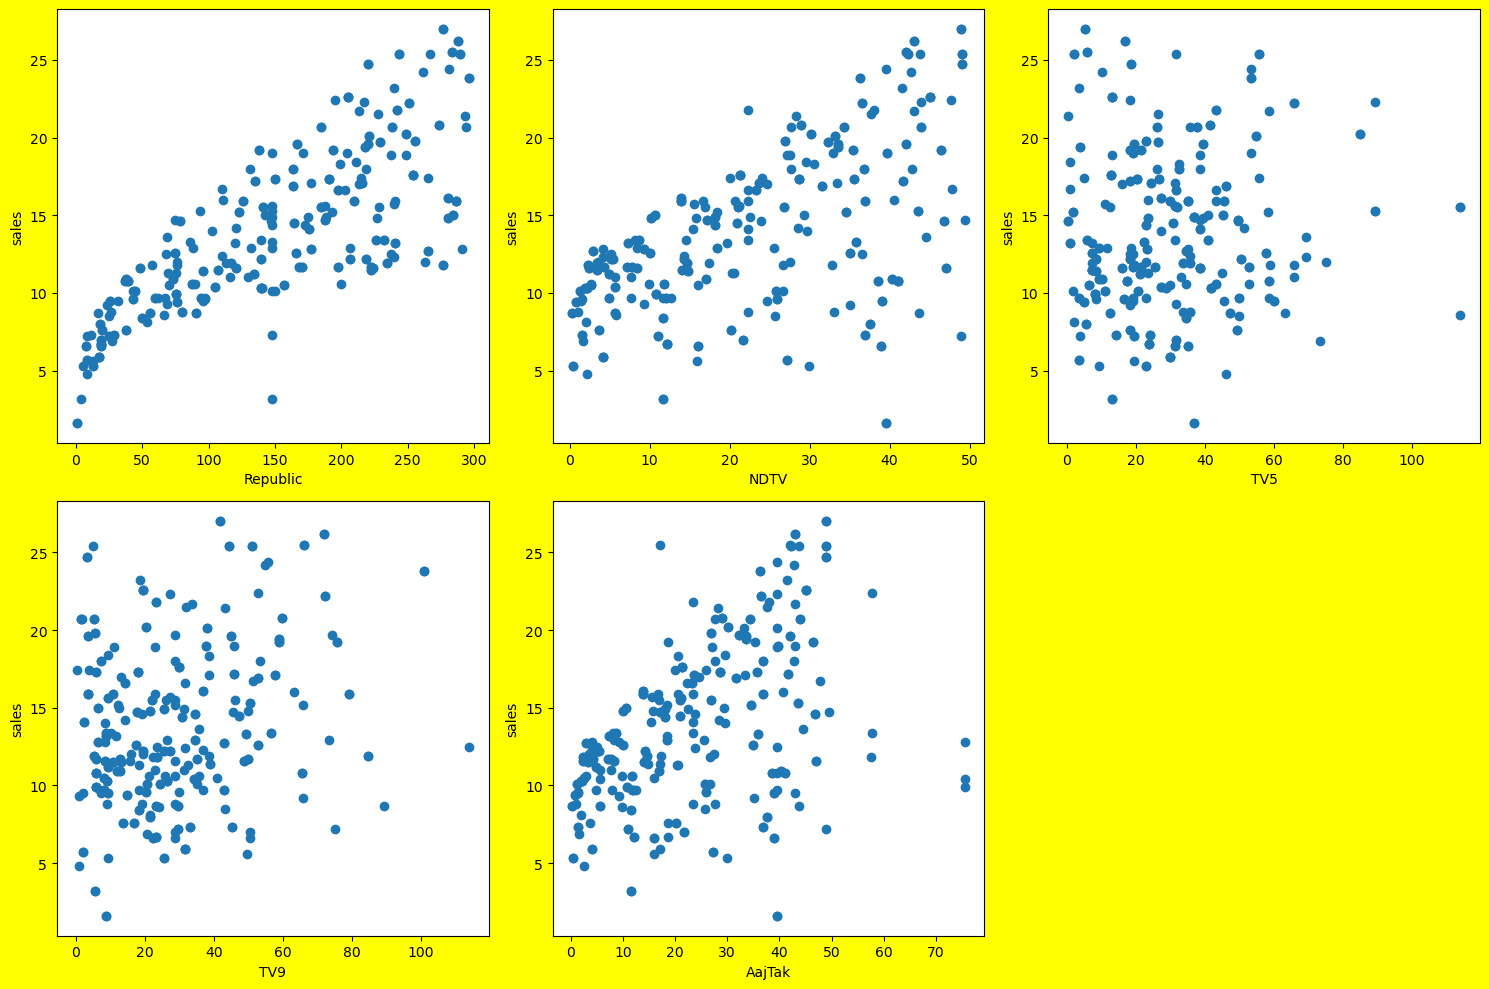

In [12]:
# Visualizing relationship
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber<=6 :
        ax = plt.subplot(2,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('sales',fontsize=10)
    plotnumber+=1
plt.tight_layout()

## As we do not see relationship between TV5,TV9 vs Sales, so we will remove these columns. To make sure you can also check coefficients of all features

In [13]:
X.drop(columns=['TV5','TV9'],axis=1,inplace=True)

In [14]:
# Data Scaling. Formula Z = (X - mean)/std

scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [16]:
# Split data into train and test. Model will be built on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=100)
y_train.head()

249    19.0
257    13.3
120    10.8
88     14.8
177     9.9
Name: sales, dtype: float64

### Model instantiating and training

In [17]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

### Sample prediction of future Sales

In [18]:
X.tail(2)

,Republic,NDTV,AajTak
303,75.5,10.8,75.5
304,17.2,4.1,17.2


In [19]:
# Since we have already fit the scaler, you can transform the data
print ('Sales prediction : ',regression.predict(scaler.transform([[75.5,	10.8,	75.5]])))

Sales prediction :  [10.41077521]


# Checking model accuracy and residuals

In [26]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [21]:
# Prediction for test data
y_pred = regression.predict(x_test)

In [22]:
# Model Accuracy
r2_score(y_test,y_pred)

0.8960140881186806

In [23]:
# Residuals
mean_absolute_error(y_test,y_pred)

1.3688827041256264

In [24]:
mean_squared_error(y_test,y_pred)

2.877843171434236

In [25]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.696420694118719